# SVM Classifier

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('EmployeeAttrition.csv')#importing the dataset

# EDA  Approach

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Label Encoding 


In [4]:
data['Attrition'].replace(('Yes', 'No'), (1, 0), inplace=True)
data['Gender'].replace(('Male','Female'), (1, 0), inplace=True)
data['MaritalStatus'].replace(('Single','Married','Divorced'), (0,1,2), inplace=True)
data['OverTime'].replace(('Yes','No'), (1, 0), inplace=True)
data['Over18'].replace(('Y','N'), (1, 0), inplace=True)

# # Lets check the distribution of each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002418EBD2C50>,
      dtype=object)

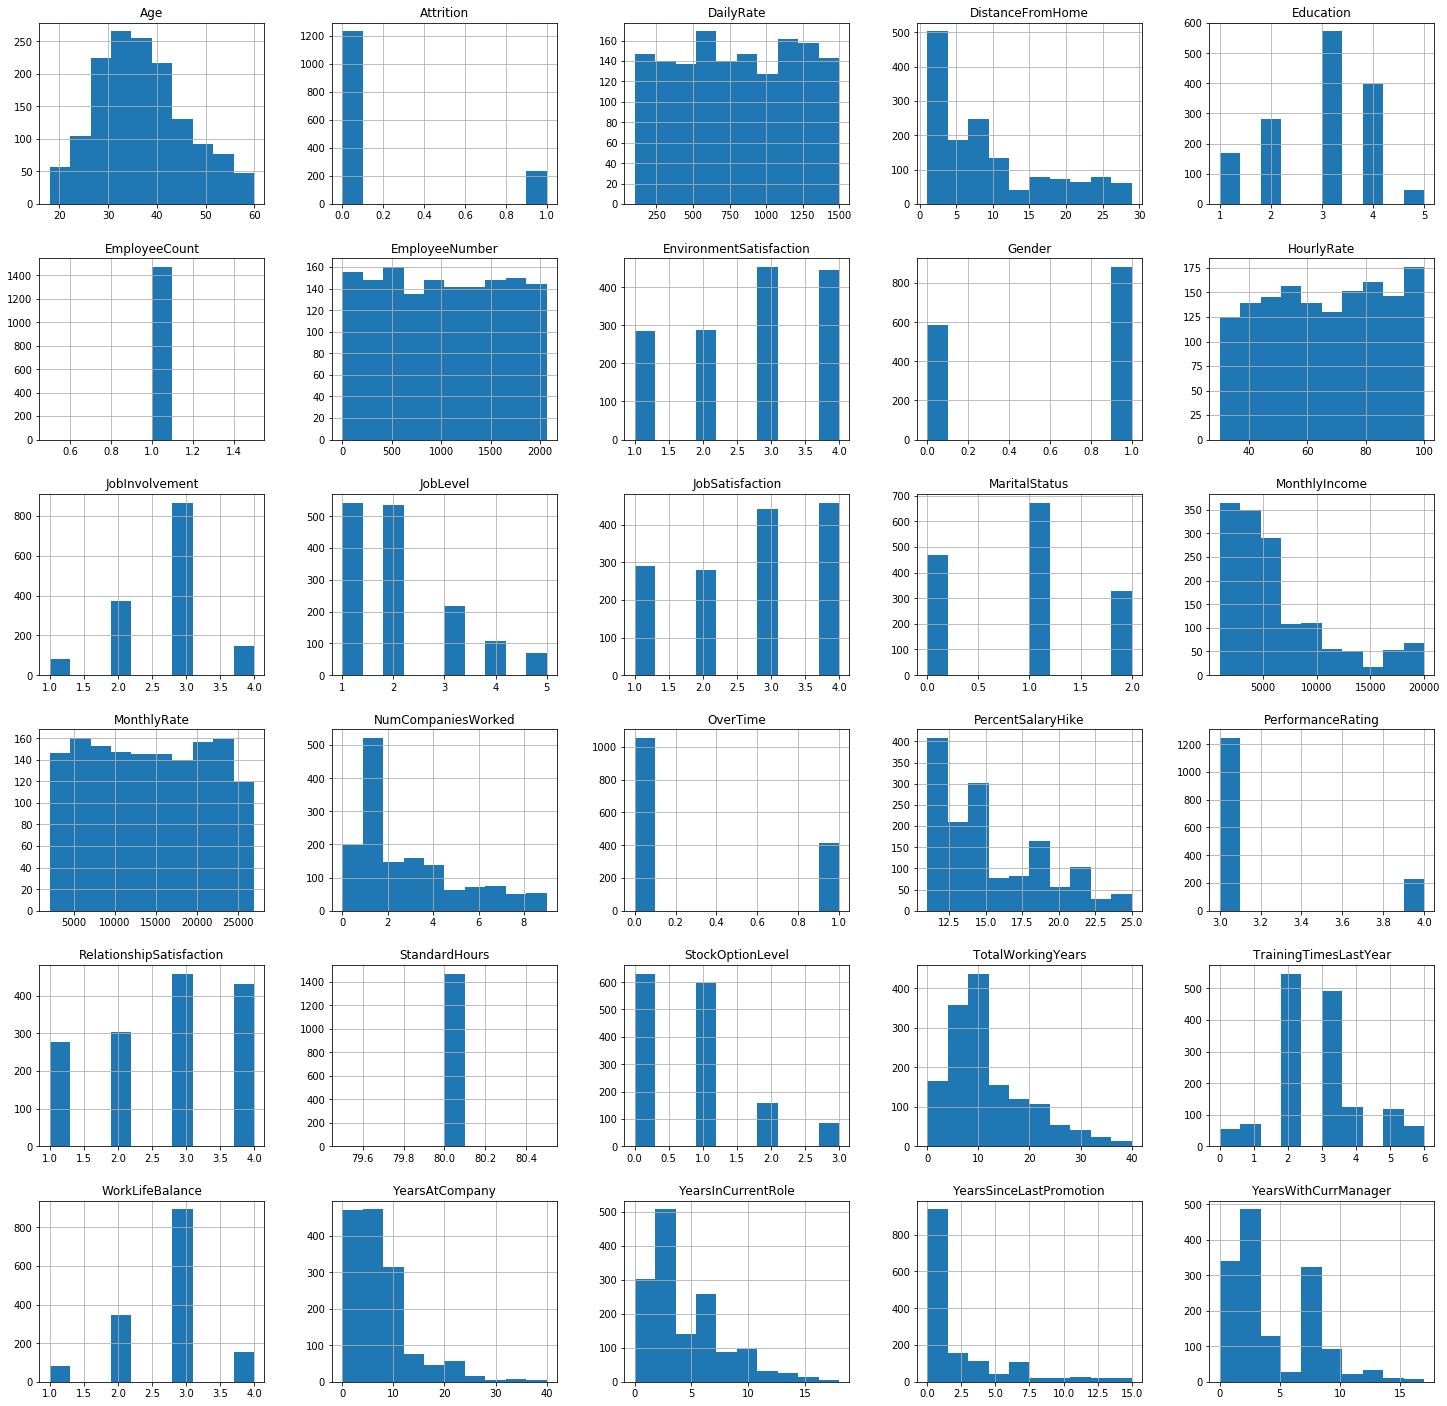

In [5]:
data.hist(figsize=(25,25))

# Finding the correlation of all the features wrt. the target variable

In [6]:
emp_correlation=data.corr()
cor=emp_correlation['Attrition'].sort_values(ascending=True)
cor

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
MaritalStatus              -0.162070
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
Gender                      0.029453
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
OverTime                    0.246118
A

In [7]:
features=['Age','Attrition','DailyRate','DistanceFromHome',            
         'JobSatisfaction','MonthlyIncome','StandardHours','PercentSalaryHike','HourlyRate',
         'MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
          'YearsSinceLastPromotion','YearsWithCurrManager']
dataset=data[features]

# We have selected only the features that truely contribute for Target variable

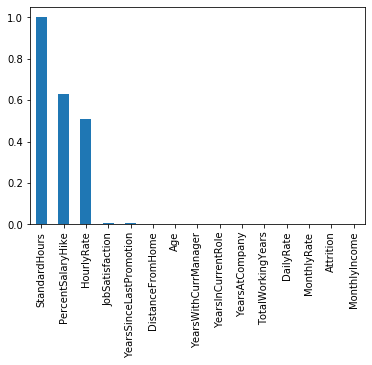

In [8]:
from sklearn.feature_selection import chi2
chi_scores = chi2(dataset,dataset['Attrition'])


p_values = pd.Series(chi_scores[1],index = dataset.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

# Here we find that the p-values of standardhours,percentagesalaryhike,hourlyrate,no.ofcompaniesworked and gender is higher than 0.05 so,we donot include them in our model

In [9]:
features=['Age','Attrition','DailyRate','DistanceFromHome',            
         'JobSatisfaction','MonthlyIncome',
         'MonthlyRate',
         'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
          'YearsSinceLastPromotion','YearsWithCurrManager']
dataset=data[features]

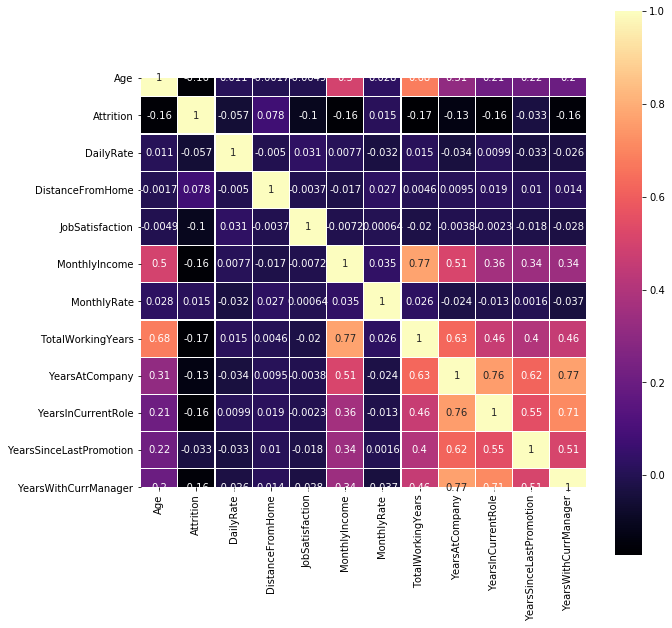

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

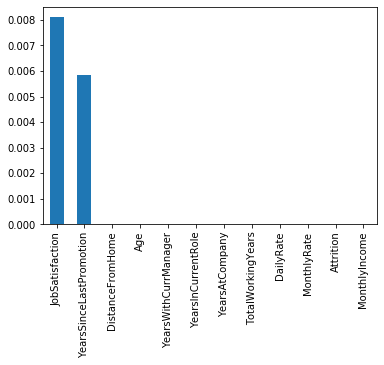

In [11]:
from sklearn.feature_selection import chi2
chi_scores = chi2(dataset,dataset['Attrition'])

p_values = pd.Series(chi_scores[1],index = dataset.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

# Outlier check

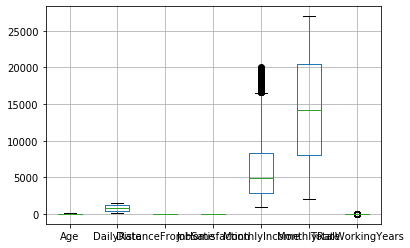

In [12]:
boxplot = data.boxplot(column=['Age','DailyRate','DistanceFromHome', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears'])

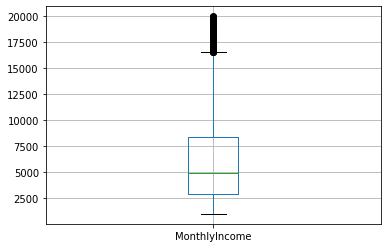

In [13]:
boxplot = data.boxplot(column=['MonthlyIncome'])

# Limiting the MonthlyIncome to 12000

In [14]:
data=data[data['MonthlyIncome'] < 12000]

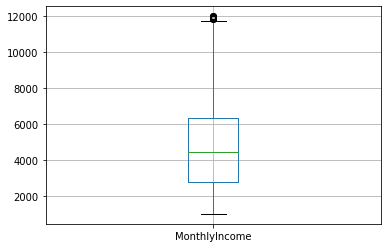

In [15]:
boxplot = data.boxplot(column=['MonthlyIncome'])

In [16]:
data.shape

(1275, 35)

# As the Target variable is Attrition lets check the distribution of it.


# We find more number of 0's than 1's which when trained to a model may give inaccurate results

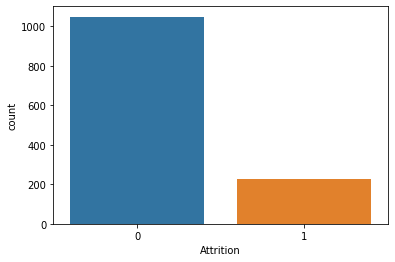

In [17]:
sns.countplot(data.Attrition)

# Upsampling the target variable 


In [18]:
from sklearn.utils import resample
df_majority = dataset[dataset.Attrition==0]
df_minority = dataset[dataset.Attrition==1]

# As the majority class has 1233 rows we increase the minority upto that value


In [19]:
df_majority['Attrition'].count()

1233

# Upsampling the minority class to equal the majority class


In [20]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=1233,random_state=123)    

# Combine majority class with upsampled minority class

In [21]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [22]:
df_upsampled.shape

y = df_upsampled.Attrition
X = df_upsampled.drop('Attrition', axis=1)


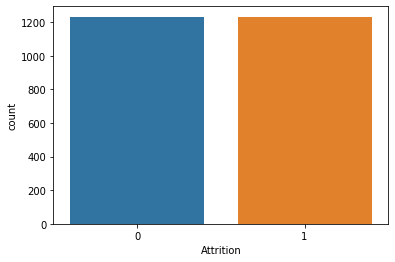

In [23]:

sns.countplot(df_upsampled.Attrition)#Now we have balanced the dependent variable

# Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Machine (SVM)

# https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul

# https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel#:~:text=then%20the%20classifier%20learned%20using%20a%20large%20c%20value%20is%20best.&text=then%20the%20classifier%20learned%20using%20a%20low%20c%20value%20is,not%20produce%20a%20different%20hyperplane.

# Fitting SVM to the Training set

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C=25.5,random_state =0)
classifier.fit(X_train, y_train)


SVC(C=25.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

#  Predicting the Test set results

In [27]:

y_pred = classifier.predict(X_test)


# Confusion Matrix

In [28]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[236,  79],
       [ 34, 268]], dtype=int64)





# Accuracy check on the training data

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8168557536466775

# ROC Curve

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Lets check the ROC curve,The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier

AUC: 0.82
0.8183117838746978


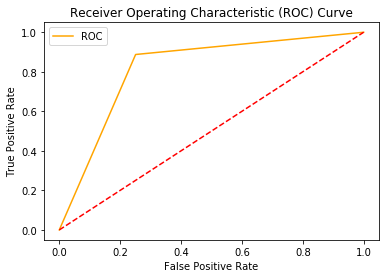

In [32]:

auc = roc_auc_score(y_test,y_pred)
print('AUC: %.2f' % auc)
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

# Here the AUC value is 0.82 which tells that the classifier is performing good

# RMSE



In [33]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(y_pred,y_test)

0.4279535563040954


# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.